# Worked Examples: scipy.optimize.minimize()

These worked solutions correspond to the exercises in [Using `scipy.optimize.minimize()`](../geometry_optimisation/scipy_optimize_minimize.ipynb).

**How to use this notebook:**
- Try each exercise yourself first before looking at the solution
- The code cells show both the code and its output
- Download this notebook to run and experiment with the code yourself
- Your solution might look different - that's fine as long as it gives the correct ans

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

%config InlineBackend.figure_format='retina'

# Define constants for Lennard-Jones potential
A = 1e5  # eV Å^12
B = 40   # eV Å^6

---

## Exercise 1: Lennard-Jones Potential with scipy

Use `scipy.optimize.minimize()` to optimise the Lennard-Jones potential with different starting positions.

In [2]:
def lennard_jones(r, A, B):
    """
    Calculate the Lennard-Jones potential energy.
    
    Args:
        r (float): Interatomic separation in Angstroms.
        A (float): Repulsive term coefficient (eV Å^12).
        B (float): Attractive term coefficient (eV Å^6).
        
    Returns:
        float: Potential energy in eV.
    """
    return A / r**12 - B / r**6

# Test the function
test_r = 4.4
print(f"At r = {test_r} Å, U = {lennard_jones(test_r, A, B):.6f} eV")

At r = 4.4 Å, U = -0.003613 eV


### Parts B-C: Run minimize() from three starting positions

Test scipy.optimize.minimize() with starting values r = 3.2 Å, r = 4.4 Å, and r = 6.0 Å.

In [6]:
# Starting positions to test
starting_positions = [3.2, 4.4, 6.0]  # Å

# Store results
results = []

print("SCIPY.OPTIMIZE.MINIMIZE() RESULTS")

for r_start in starting_positions:
    # Run optimization
    result = minimize(lennard_jones, x0=r_start, args=(A, B))
    
    # Store result
    results.append(result)
    
    # Print results for this starting position
    print(f"\nStarting position: r = {r_start:.1f} Å")
    print(f"Final optimised position: r = {result.x[0]:.4f} Å")
    print(f"Number of iterations: {result.nit}")
    print(f"Success: {result.success}")
    print(f"Final energy: U = {result.fun:.6f} eV")


SCIPY.OPTIMIZE.MINIMIZE() RESULTS

Starting position: r = 3.2 Å
Final optimised position: r = 4.1349 Å
Number of iterations: 9
Success: True
Final energy: U = -0.004000 eV

Starting position: r = 4.4 Å
Final optimised position: r = 4.1348 Å
Number of iterations: 3
Success: True
Final energy: U = -0.004000 eV

Starting position: r = 6.0 Å
Final optimised position: r = 4.1351 Å
Number of iterations: 3
Success: True
Final energy: U = -0.004000 eV


### Part D: Analysis

Do all starting points converge to the same minimum? Why or why not?

**Answer:**

Yes, all three starting positions successfully converge to essentially the same minimum at r ≈ 4.13-4.14 Å, with a minimum energy of U ≈ -0.004 eV.

**Why does scipy.optimize.minimize() succeed where Newton-Raphson failed?**

Recall from the synoptic exercise that Newton-Raphson failed when starting from r = 6.0 Å because it assumed positive curvature, which doesn't hold in the long-range tail of the potential. However, `scipy.optimize.minimize()` successfully converges from all three starting positions, including r = 6.0 Å.

The key difference is that `minimize()` uses a more sophisticated and robust optimisation algorithm that includes safeguards against the problems that caused Newton-Raphson to fail. It can handle regions with negative curvature and poor initial guesses, whilst still converging efficiently.

**Iteration counts:**

- r = 3.2 Å: 9 iterations
- r = 4.4 Å: 3 iterations (already close to minimum)
- r = 6.0 Å: 3 iterations (succeeds where Newton-Raphson failed!)

The relatively small variation in iteration count (3-9 iterations) demonstrates the robustness of the algorithm across different starting positions.

**Key lesson:**

For practical molecular geometry optimisation, `scipy.optimize.minimize()` is the recommended approach. It combines the robustness needed to handle difficult cases with the efficiency needed for practical calculations.

---

## Exercise 2: Multiple Minima in 1,2-Dichloroethane

This exercise explores how the choice of starting geometry affects which minimum the optimiser finds for a potential with multiple minima.

### Part A: Define and Visualise the Potential Energy Surface

Questions 1-4: Define the dihedral potential function and visualise the potential energy surface.

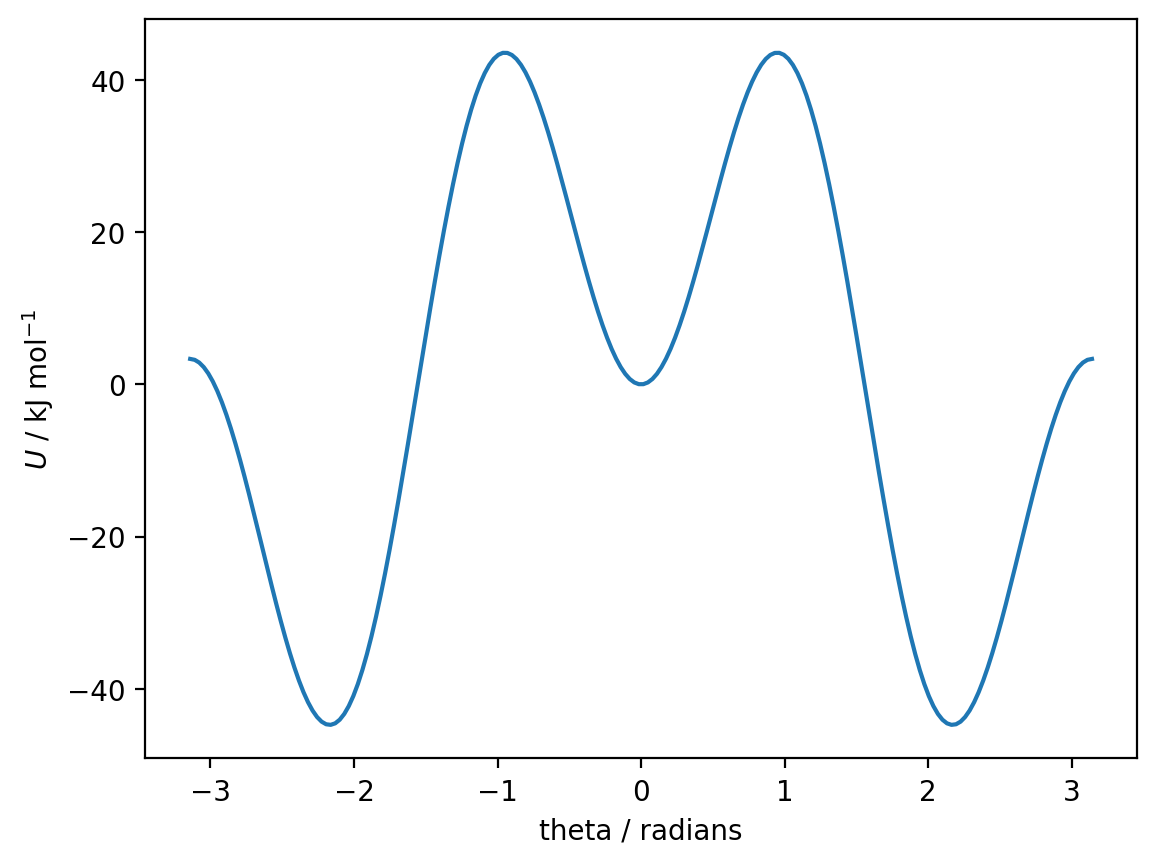

In [11]:
def dihedral_potential(theta, A1, A2, A3):
    """
    Calculate the potential energy function of a dihedral bond angle.
    
    Args:
        theta (float): The dihedral angle in radians.
        A1 (float): Parameter A1 in kJ/mol.
        A2 (float): Parameter A2 in kJ/mol.
        A3 (float): Parameter A3 in kJ/mol.
        
    Returns:
        float: Potential energy in kJ/mol.
    """
    return 0.5 * (  A1 * (1 + np.cos(theta))      # Splitting this bracketed expression
                  + A2 * (1 + np.cos(2 * theta))  # over multiple lines makes it 
                  + A3 * (1 + np.cos(3 * theta))) # more readable

# Note the use of np.cos instead of math.cos.
# This allows our function to operate on single values of theta, 
# *and* np.array values of theta.

# Define parameters
A1 = 55.229   # kJ/mol
A2 = 3.3472   # kJ/mol
A3 = -58.576  # kJ/mol

# Create array of theta values from -π to +π
theta = np.linspace(-np.pi, np.pi, 200)

# Plot the potential energy surface
plt.plot(theta, dihedral_potential(theta, A1, A2, A3))
plt.xlabel('theta / radians')
plt.ylabel('$U$ / kJ mol$^{-1}$')
plt.show()

**Analysis of the potential energy surface:**

By examining the plot, we can identify **three distinct minima**:

1. A deep minimum near θ ≈ -2.1 radians (around -120°) - gauche conformation (~-45 kJ/mol)
2. A shallow minimum near θ ≈ 0 radians (0°) - (~0 kJ/mol)
3. A deep minimum near θ ≈ +2.1 radians (around +120°) - gauche conformation (~-45 kJ/mol)

There are also **three maxima**:
- Near θ ≈ -1 radians (~+45 kJ/mol)
- Near θ ≈ +1 radians (~+45 kJ/mol)
- At θ ≈ ±π radians (~+5 kJ/mol)

The **global minima** are the two gauche conformations at θ ≈ ±2.1 radians, with energy around -45 kJ/mol. Due to the symmetry of the molecule, these represent mirror-image conformations with the same energy.

### Part C: Systematic Exploration of Starting Points

Questions 8-10: Systematically test many starting points to map out the basins of attraction.

In [12]:
# Question 8: Create array of 20 starting angles
start_angles = np.linspace(-np.pi, np.pi, 20)

# Question 9: Create empty lists
start_positions = []
final_positions = []

# Question 10: Loop through all starting angles
for theta0 in start_angles:
    result = minimize(dihedral_potential, x0=theta0, args=(A1, A2, A3))
    start_positions.append(theta0)
    final_positions.append(result.x[0])

print(f"Tested {len(start_angles)} starting positions")
print(f"Starting angles range from {start_angles[0]:.2f} to {start_angles[-1]:.2f} radians")

Tested 20 starting positions
Starting angles range from -3.14 to 3.14 radians


### Part D: Visualise the Basins of Attraction

Question 11: Create a scatter plot showing which starting positions lead to which minima.

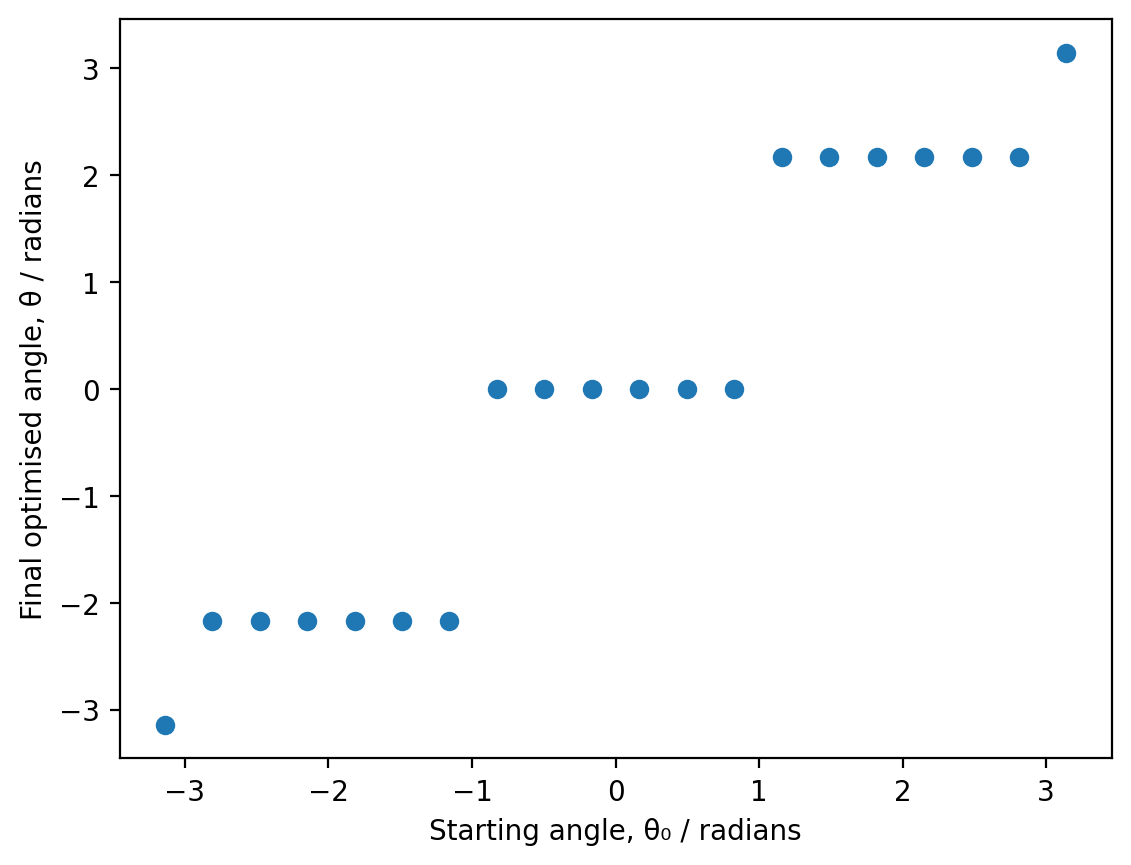

In [13]:
plt.scatter(start_positions, final_positions)
plt.xlabel('Starting angle, θ₀ / radians')
plt.ylabel('Final optimised angle, θ / radians')
plt.show()

**Question 12: How many distinct minima does the scatter plot reveal?**

The scatter plot shows **three horizontal bands**, corresponding to three distinct minima:

1. A band near θ ≈ -2.1 radians (left gauche conformation)
2. A band near θ ≈ 0 radians (eclipsed conformation)
3. A band near θ ≈ +2.1 radians (right gauche conformation)

You may notice isolated points near θ ≈ ±3.14 (±π). These don't represent a minimum - rather, ±π is a local **maximum** where the gradient is zero. When the optimizer starts exactly at (or extremely close to) this maximum, it incorrectly "converges" immediately because the gradient is already below the tolerance threshold. This demonstrates a limitation of gradient-based optimizers: they can get stuck at any stationary point (minimum, maximum, or saddle point) where the gradient is zero.

Therefore, there are **three physically distinct minima**.

**Question 13: Basins of attraction**

Each minimum has a "basin of attraction" - a range of starting angles that lead to that minimum:

- **Left gauche minimum** (θ ≈ -2.1 rad): Starting angles roughly from -π to about -0.5 radians converge here
- **Eclipsed minimum** (θ ≈ 0 rad): Starting angles roughly from -0.5 to +0.5 radians converge here
- **Right gauche minimum** (θ ≈ +2.1 rad): Starting angles roughly from +0.5 to +π radians converge here

The boundaries between basins correspond to the maxima on the potential energy surface - points where the gradient could direct the optimiser towards either adjacent minimum.

**Question 14: Strategy for finding the global minimum**

Looking back at the potential energy plot from Part A, the **gauche conformations** (near θ ≈ ±2.1 radians) have the lowest energy (approx. -45 kJ/mol) and represent the global minimum. The eclipsed conformation at θ ≈ 0 is a local minimum but has much higher energy (approx. 0 kJ/mol).

To reliably find the global minimum when you have a potential with multiple minima:

1. **Sample many starting positions** across the full range of possible angles (as we did in Part C)
2. **Compare the final energies** from all optimisations to identify which is lowest
3. **Select the structure with the lowest energy** as the global minimum

Simply running `minimize()` once from a single arbitrary starting point is not sufficient for systems with multiple minima - you might find a local minimum instead of the global minimum. This is a fundamental challenge in molecular modelling: local optimisation methods only guarantee finding a nearby minimum, not the global minimum.